In [1]:
import json
import numpy as np

In [2]:
from numpy import mean
nome_modelo = 'mBERT'
metricas = {'precision': [], 'recall': [], 'f1': [], 'accuracy': [], 'epochs': [], 'training_time': []}
for i in range(1, 4):
    dados = json.load(open(f'/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Metricas/Objetos/CrossValidation/NaoCongelado/TestesCrossValid/metricsObjetoTeste{i}-{nome_modelo}.json'))
    metricas['precision'].append(dados['precisao'])
    metricas['recall'].append(dados['recall'])
    metricas['f1'].append(dados['f1'])
    metricas['accuracy'].append(dados['acuracia'])
    metricas['epochs'].append(dados['mean_epochs'])
    metricas['training_time'].append(dados['mean_training_time_epoch'])
metricas_finais = {k: mean(v) for k, v in metricas.items()}
metricas_finais['modelo'] = nome_modelo
json.dump(metricas_finais, open(f'/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Metricas/Objetos/CrossValidation/NaoCongelado/TestesCrossValid/Medias/metricsObjetoTeste-{nome_modelo}.json', 'w'))

### Geração das curvas train_loss, val_loss e f1

In [3]:
metricas = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Metricas/Objetos/CrossValidation/Congelado/TestesCrossValid/metricsObjetoCongelado-1-HelBERT-uncased-fs-6.json'))

In [28]:
menor_tamanho = min(len(metricas['f1_curve'][0]), len(metricas['f1_curve'][1]), len(metricas['f1_curve'][2]), len(metricas['f1_curve'][3]), len(metricas['f1_curve'][4]))
media_f1 = (np.array(metricas['f1_curve'][0][:menor_tamanho]) + np.array(metricas['f1_curve'][1][:menor_tamanho]) + np.array(metricas['f1_curve'][2][:menor_tamanho]) + np.array(metricas['f1_curve'][3][:menor_tamanho]) + np.array(metricas['f1_curve'][4][:menor_tamanho]))/5
media_f1

array([0.7737905 , 0.84437887, 0.86611242, 0.87524098, 0.88269104,
       0.88798021, 0.88521229, 0.89781916, 0.89576808, 0.89808314])

In [29]:
menor_tamanho = min(len(metricas['val_loss_curve'][0]), len(metricas['val_loss_curve'][1]), len(metricas['val_loss_curve'][2]), len(metricas['val_loss_curve'][3]), len(metricas['val_loss_curve'][4]))
media_val_loss = (np.array(metricas['val_loss_curve'][0][:menor_tamanho]) + np.array(metricas['val_loss_curve'][1][:menor_tamanho]) + np.array(metricas['val_loss_curve'][2][:menor_tamanho]) + np.array(metricas['val_loss_curve'][3][:menor_tamanho]) + np.array(metricas['val_loss_curve'][4][:menor_tamanho]))/5
media_val_loss

array([0.65006827, 0.44471268, 0.36517846, 0.33133101, 0.31261199,
       0.30335639, 0.30147783, 0.28555687, 0.292444  , 0.28509183])

In [30]:
menor_tamanho = min(len(metricas['train_loss_curve'][0]), len(metricas['train_loss_curve'][1]), len(metricas['train_loss_curve'][2]), len(metricas['train_loss_curve'][3]), len(metricas['train_loss_curve'][4]))
media_train_loss = (np.array(metricas['train_loss_curve'][0][:menor_tamanho]) + np.array(metricas['train_loss_curve'][1][:menor_tamanho]) + np.array(metricas['train_loss_curve'][2][:menor_tamanho]) + np.array(metricas['train_loss_curve'][3][:menor_tamanho]) + np.array(metricas['train_loss_curve'][4][:menor_tamanho]))/5
media_train_loss

array([0.96120241, 0.52961855, 0.38356144, 0.30891124, 0.25800816,
       0.22541239, 0.19823906, 0.17746949, 0.15956642, 0.14488388])

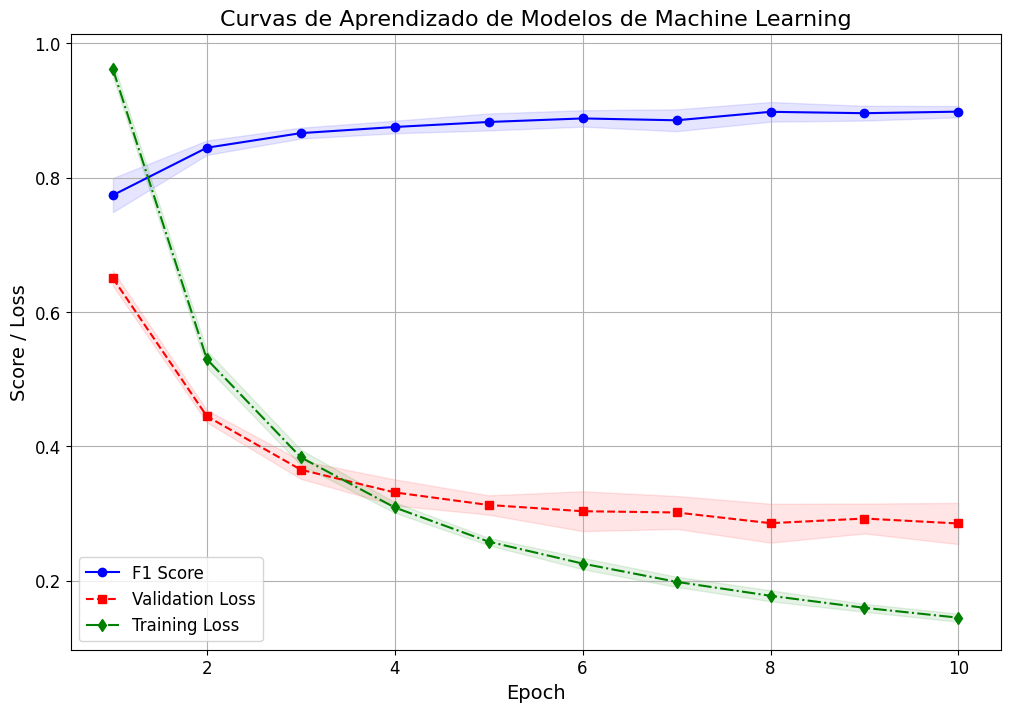

In [35]:
# Plotando o gráfico
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))

epochs = range(1, menor_tamanho + 1)

plt.plot(epochs, media_f1, label='F1 Score', linestyle='-', marker='o', color='b')
plt.plot(epochs, media_val_loss, label='Validation Loss', linestyle='--', marker='s', color='r')
plt.plot(epochs, media_train_loss, label='Training Loss', linestyle='-.', marker='d', color='g')

# Títulos e rótulos
plt.title('Curvas de Aprendizado de Modelos de Machine Learning', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Score / Loss', fontsize=14)

# Adicionando grade
plt.grid(True)

# Adicionando legenda
plt.legend(fontsize=12)

# Melhorando a legibilidade dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionando intervalo de confiança (simulado para o exemplo)
std_dev_f1 = np.std([np.array(metricas['f1_curve'][i][:menor_tamanho]) for i in range(5)], axis=0)
std_dev_val_loss = np.std([np.array(metricas['val_loss_curve'][i][:menor_tamanho]) for i in range(5)], axis=0)
std_dev_train_loss = np.std([np.array(metricas['train_loss_curve'][i][:menor_tamanho]) for i in range(5)], axis=0)

plt.fill_between(epochs, media_f1 - std_dev_f1, media_f1 + std_dev_f1, color='b', alpha=0.1)
plt.fill_between(epochs, media_val_loss - std_dev_val_loss, media_val_loss + std_dev_val_loss, color='r', alpha=0.1)
plt.fill_between(epochs, media_train_loss - std_dev_train_loss, media_train_loss + std_dev_train_loss, color='g', alpha=0.1)

# Exibindo o gráfico
plt.show()

### Curva F1 Score

In [1]:
# Mudar a quantidade de épocas, colocando a quantidade para cada modelo.

In [6]:
helbert_6 = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Metricas/Objetos/CrossValidation/Congelado/TestesCrossValid/metricsObjetoCongelado-1-HelBERT-uncased-fs-6.json'))
bertimbau = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Metricas/Objetos/CrossValidation/Congelado/TestesCrossValid/metricsObjetoCongelado-1-BERTimbau.json'))
legal_bert = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Metricas/Objetos/CrossValidation/Congelado/TestesCrossValid/metricsObjetoCongelado-1-LegalBERT-pt-sc.json'))
juris_bert = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Metricas/Objetos/CrossValidation/Congelado/TestesCrossValid/metricsObjetoCongelado-1-jurisBERT.json'))
mbert = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Metricas/Objetos/CrossValidation/Congelado/TestesCrossValid/metricsObjetoCongelado-1-mBERT.json'))

In [7]:
menor_tamanho = min(len(helbert_6['f1_curve'][0]), len(helbert_6['f1_curve'][1]), len(helbert_6['f1_curve'][2]), len(helbert_6['f1_curve'][3]), len(helbert_6['f1_curve'][4]))
media_f1_helbert_6 = (np.array(helbert_6['f1_curve'][0][:menor_tamanho]) + np.array(helbert_6['f1_curve'][1][:menor_tamanho]) + np.array(helbert_6['f1_curve'][2][:menor_tamanho]) + np.array(helbert_6['f1_curve'][3][:menor_tamanho]) + np.array(helbert_6['f1_curve'][4][:menor_tamanho]))/5
#media_f1_helbert_16 = (np.array(helbert_16['f1_curve'][0][:menor_tamanho]) + np.array(helbert_16['f1_curve'][1][:menor_tamanho]) + np.array(helbert_16['f1_curve'][2][:menor_tamanho]) + np.array(helbert_16['f1_curve'][3][:menor_tamanho]) + np.array(helbert_16['f1_curve'][4][:menor_tamanho]))/5
#media_f1_helbert_30 = (np.array(helbert_30['f1_curve'][0][:menor_tamanho]) + np.array(helbert_30['f1_curve'][1][:menor_tamanho]) + np.array(helbert_30['f1_curve'][2][:menor_tamanho]) + np.array(helbert_30['f1_curve'][3][:menor_tamanho]) + np.array(helbert_30['f1_curve'][4][:menor_tamanho]))/5
media_f1_bertimbau = (np.array(bertimbau['f1_curve'][0][:menor_tamanho]) + np.array(bertimbau['f1_curve'][1][:menor_tamanho]) + np.array(bertimbau['f1_curve'][2][:menor_tamanho]) + np.array(bertimbau['f1_curve'][3][:menor_tamanho]) + np.array(bertimbau['f1_curve'][4][:menor_tamanho]))/5
media_f1_legal_bert = (np.array(legal_bert['f1_curve'][0][:menor_tamanho]) + np.array(legal_bert['f1_curve'][1][:menor_tamanho]) + np.array(legal_bert['f1_curve'][2][:menor_tamanho]) + np.array(legal_bert['f1_curve'][3][:menor_tamanho]) + np.array(legal_bert['f1_curve'][4][:menor_tamanho]))/5
media_f1_juris_bert = (np.array(juris_bert['f1_curve'][0][:menor_tamanho]) + np.array(juris_bert['f1_curve'][1][:menor_tamanho]) + np.array(juris_bert['f1_curve'][2][:menor_tamanho]) + np.array(juris_bert['f1_curve'][3][:menor_tamanho]) + np.array(juris_bert['f1_curve'][4][:menor_tamanho]))/5
media_f1_mbert = (np.array(mbert['f1_curve'][0][:menor_tamanho]) + np.array(mbert['f1_curve'][1][:menor_tamanho]) + np.array(mbert['f1_curve'][2][:menor_tamanho]) + np.array(mbert['f1_curve'][3][:menor_tamanho]) + np.array(mbert['f1_curve'][4][:menor_tamanho]))/5

In [8]:
#f1_curves = [media_f1_helbert_6, media_f1_helbert_16, media_f1_helbert_30, media_f1_bertimbau, media_f1_legal_bert, media_f1_juris_bert, media_f1_mbert]
f1_curves = [media_f1_helbert_6, media_f1_bertimbau, media_f1_legal_bert, media_f1_juris_bert, media_f1_mbert]

In [9]:
#modelos = ['HelBERT-uncased-fs-6', 'HelBERT-uncased-fs-16', 'HelBERT-base-uncased-30','BERTimbau', 'LegalBERT-pt-sc', 'JurisBERT', 'mBERT']
modelos = ['HelBERT-uncased-fs-6', 'BERTimbau', 'LegalBERT-pt-sc', 'JurisBERT', 'mBERT']

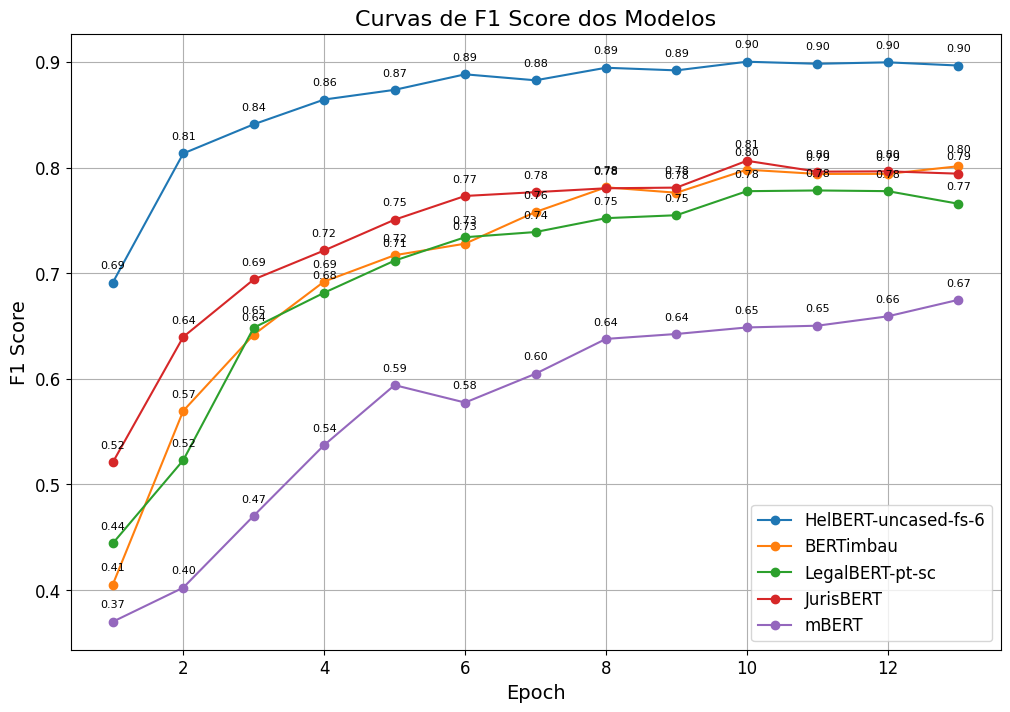

In [10]:
import matplotlib.pyplot as plt

# Plotando o gráfico
plt.figure(figsize=(12, 8))

epochs = range(1, menor_tamanho + 1)

# Plotando cada curva de F1 Score
for i, f1_curve in enumerate(f1_curves):
    plt.plot(epochs, f1_curve, label=f'{modelos[i]}', linestyle='-', marker='o')
    
    # Adicionando os valores nas linhas
    for j, value in enumerate(f1_curve):
        plt.annotate(f'{value:.2f}', (epochs[j], f1_curve[j]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Títulos e rótulos
plt.title('Curvas de F1 Score dos Modelos', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)

# Adicionando grade
plt.grid(True)

# Adicionando legenda
plt.legend(fontsize=12)

# Melhorando a legibilidade dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Exibindo o gráfico
plt.show()


### Curva Val_loss

In [11]:
helbert_6 = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Metricas/Objetos/CrossValidation/Congelado/TestesCrossValid/metricsObjetoCongelado-1-HelBERT-uncased-fs-6.json'))
bertimbau = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Metricas/Objetos/CrossValidation/Congelado/TestesCrossValid/metricsObjetoCongelado-1-BERTimbau.json'))
legal_bert = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Metricas/Objetos/CrossValidation/Congelado/TestesCrossValid/metricsObjetoCongelado-1-LegalBERT-pt-sc.json'))
juris_bert = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Metricas/Objetos/CrossValidation/Congelado/TestesCrossValid/metricsObjetoCongelado-1-jurisBERT.json'))
mbert = json.load(open('/var/projetos/Jupyterhubstorage/victor.silva/HelBERTModel/Metricas/Objetos/CrossValidation/Congelado/TestesCrossValid/metricsObjetoCongelado-1-mBERT.json'))

In [12]:
menor_tamanho = min(len(helbert_6['val_loss_curve'][0]), len(helbert_6['val_loss_curve'][1]), len(helbert_6['val_loss_curve'][2]), len(helbert_6['val_loss_curve'][3]), len(helbert_6['val_loss_curve'][4]))
media_val_loss_helbert_6 = (np.array(helbert_6['val_loss_curve'][0][:menor_tamanho]) + np.array(helbert_6['val_loss_curve'][1][:menor_tamanho]) + np.array(helbert_6['val_loss_curve'][2][:menor_tamanho]) + np.array(helbert_6['val_loss_curve'][3][:menor_tamanho]) + np.array(helbert_6['val_loss_curve'][4][:menor_tamanho]))/5
media_val_loss_bertimbau = (np.array(bertimbau['val_loss_curve'][0][:menor_tamanho]) + np.array(bertimbau['val_loss_curve'][1][:menor_tamanho]) + np.array(bertimbau['val_loss_curve'][2][:menor_tamanho]) + np.array(bertimbau['val_loss_curve'][3][:menor_tamanho]) + np.array(bertimbau['val_loss_curve'][4][:menor_tamanho]))/5
media_val_loss_legal_bert = (np.array(legal_bert['val_loss_curve'][0][:menor_tamanho]) + np.array(legal_bert['val_loss_curve'][1][:menor_tamanho]) + np.array(legal_bert['val_loss_curve'][2][:menor_tamanho]) + np.array(legal_bert['val_loss_curve'][3][:menor_tamanho]) + np.array(legal_bert['val_loss_curve'][4][:menor_tamanho]))/5
media_val_loss_juris_bert = (np.array(juris_bert['val_loss_curve'][0][:menor_tamanho]) + np.array(juris_bert['val_loss_curve'][1][:menor_tamanho]) + np.array(juris_bert['val_loss_curve'][2][:menor_tamanho]) + np.array(juris_bert['val_loss_curve'][3][:menor_tamanho]) + np.array(juris_bert['val_loss_curve'][4][:menor_tamanho]))/5
media_val_loss_mbert = (np.array(mbert['val_loss_curve'][0][:menor_tamanho]) + np.array(mbert['val_loss_curve'][1][:menor_tamanho]) + np.array(mbert['val_loss_curve'][2][:menor_tamanho]) + np.array(mbert['val_loss_curve'][3][:menor_tamanho]) + np.array(mbert['val_loss_curve'][4][:menor_tamanho]))/5

In [13]:
val_loss_curves = [media_val_loss_helbert_6, media_val_loss_bertimbau, media_val_loss_legal_bert, media_val_loss_juris_bert, media_val_loss_mbert]

In [14]:
modelos = ['HelBERT-uncased-fs-6', 'BERTimbau', 'LegalBERT-pt-sc', 'JurisBERT', 'mBERT']

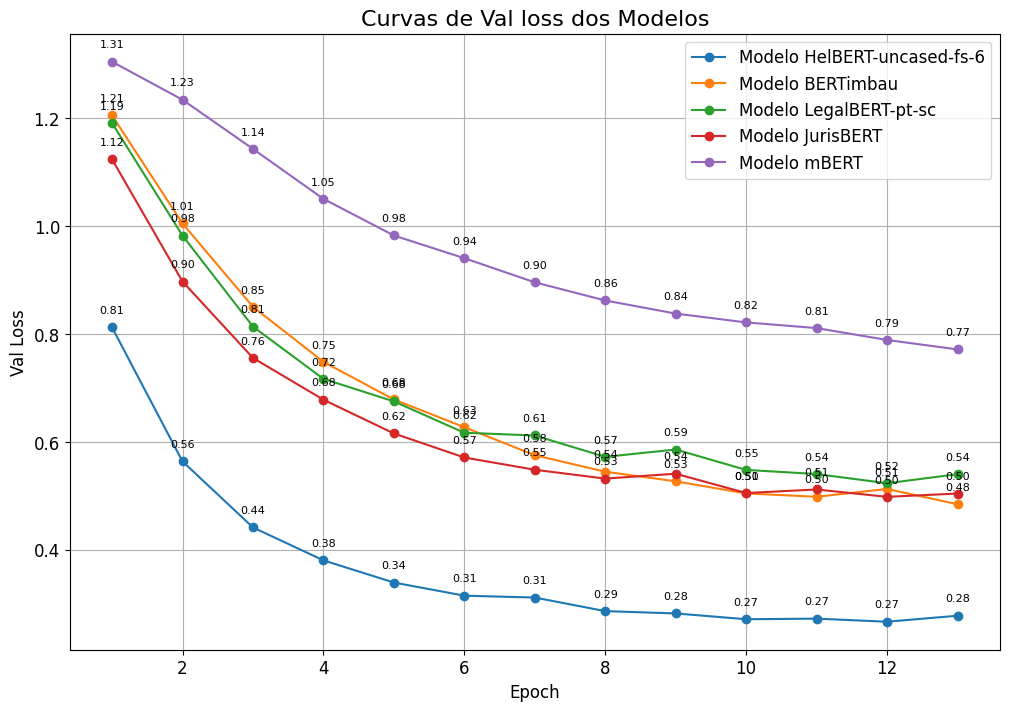

In [15]:
import matplotlib.pyplot as plt

# Plotando o gráfico
plt.figure(figsize=(12, 8))

epochs = range(1, menor_tamanho + 1)

# Plotando cada curva de F1 Score
for i, val_loss in enumerate(val_loss_curves):
    plt.plot(epochs, val_loss, label=f'Modelo {modelos[i]}', linestyle='-', marker='o')
    
    # Adicionando os valores nas linhas
    for j, value in enumerate(val_loss):
        plt.annotate(f'{value:.2f}', (epochs[j], val_loss[j]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Títulos e rótulos
plt.title('Curvas de Val loss dos Modelos', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Val Loss', fontsize=12)

# Adicionando grade
plt.grid(True)

# Adicionando legenda
plt.legend(fontsize=12)

# Melhorando a legibilidade dos eixos
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Exibindo o gráfico
plt.show()
